In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist #資料集
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Activation #神經網路層
from tensorflow.keras.models import Model #類神經網路模型
from tensorflow.keras.optimizers import Adam #優化器
from tensorflow.keras.utils import to_categorical #one-hot轉換
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# 載入 MNIST 數據集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 處理訓練集
x_train = x_train / 255.0
x_train = x_train.reshape((60000, 28, 28, 1))
y_train = to_categorical(y_train, num_classes=10)

# 處理測試集
x_test = x_test / 255.0
x_test = x_test.reshape((10000, 28, 28, 1))
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 [==============================] - 0s 0us/step



1. **特徵縮放（Feature Scaling）**：
   - `x_train = x_train / 255.0`：將訓練集中的像素值從0到255的範圍縮放到0到1之間。這是因為神經網路在處理輸入數據時，通常更容易處理小數值範圍的資料，有助於加快收斂速度和避免梯度消失或爆炸的問題。

2. **資料重塑（Reshaping Data）**：
   - `x_train = x_train.reshape((60000, 28, 28, 1))`：將訓練集的資料形狀從原始的 `(60000, 28, 28)` 重塑為 `(60000, 28, 28, 1)`。這是因為深度學習模型通常期望輸入是具有通道數的形狀，因此將資料形狀加上一個通道（灰度圖像的通道數為1）。

3. **標籤轉換（Label Encoding）**：
   - `y_train = to_categorical(y_train, num_classes=10)`：將訓練集的類別標籤進行獨熱編碼轉換。這是因為神經網路在訓練過程中需要將類別標籤轉換為獨熱向量的形式，方便模型進行多類別分類。

4. **測試集的相同處理**：
   - 對測試集進行與訓練集相同的處理，包括特徵縮放和資料重塑，以及對類別標籤的獨熱編碼轉換。

這些資料前置處理步驟是為了準備訓練和測試資料，使其適合用於深度學習模型的訓練和評估。這些步驟確保資料的一致性和適合性，有助於提高模型的訓練效果和預測準確性。

In [ ]:
# 使用 Functional API 建立模型
input_ = Input(shape=(28, 28, 1))
x = Conv2D(64, kernel_size=4, strides=2, padding='same')(input_)
x = Activation('relu')(x)
x = Conv2D(32, kernel_size=4, strides=2, padding='same')(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(10)(x)
output = Activation('softmax')(x)

optimizer = Adam(learning_rate=0.003)
model = Model(inputs=input_, outputs=output)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.summary() #可以檢視類神經網路模型的資訊：各層的輸出shape與參數量

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        1088      
                                                                 
 activation_18 (Activation)  (None, 14, 14, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 32)          32800     
                                                                 
 activation_19 (Activation)  (None, 7, 7, 32)          0         
                                                                 
 flatten_6 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                1569

### 神經網路架構與層次結構：

1. **輸入層（Input Layer）**：
   - `input_ = Input(shape=(28, 28, 1))`：輸入層的形狀是 28x28 的灰度圖像，每個像素有1個通道。

2. **卷積層（Convolutional Layers）**：
   - `Conv2D(64, kernel_size=4, strides=2, padding='same')(input_)`：使用64個4x4的卷積核，步幅為2，採用same padding保持輸出形狀不變。
   - `Conv2D(32, kernel_size=4, strides=2, padding='same')(x)`：使用32個4x4的卷積核，步幅為2，採用same padding保持輸出形狀不變。

3. **激活層（Activation Layers）**：
   - `Activation('relu')(x)`：使用ReLU激活函數激活卷積層的輸出。

4. **展平層（Flatten Layer）**：
   - `Flatten()(x)`：將卷積層的輸出展平成一維向量，以便輸入全連接層。

5. **全連接層（Dense Layer）**：
   - `Dense(10)(x)`：包含10個神經元的全連接層，輸出10個類別的分數。

6. **輸出層（Output Layer）**：
   - `Activation('softmax')(x)`：使用Softmax激活函數，將全連接層的輸出轉換為每個類別的概率分佈。

### 參數設定：

- **Optimizer（優化器）**：
  - `optimizer = Adam(learning_rate=0.003)`：使用Adam優化器，設置學習率為0.003，用於模型的參數更新。

- **Loss Function（損失函數）**：
  - `model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)`：使用交叉熵損失函數，用於衡量模型預測與真實標籤之間的差異。

- **Metrics（評估指標）**：
  - `metrics=['accuracy']`：模型的評估指標是準確度（accuracy），用於衡量模型在訓練和測試過程中的表現。

### 其他參數設定：

- **Batch Size（批次大小）**：
  - 在 `model.fit()` 中設定 `batch_size=128`：每次訓練時，模型從訓練集中隨機選取128個樣本進行訓練。

- **Epochs（訓練輪數）**：
  - 在 `model.fit()` 中設定 `epochs=4`：模型將訓練集中的所有樣本遍歷4次，每一次遍歷稱為一個epoch。

In [ ]:
# 訓練模型
history = model.fit(x_train, y_train, epochs=4, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/4
469/469 [==============================] - 43s 91ms/step - loss: 0.1910 - accuracy: 0.9445 - val_loss: 0.0765 - val_accuracy: 0.9753
Epoch 2/4
469/469 [==============================] - 37s 79ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0526 - val_accuracy: 0.9830
Epoch 3/4
469/469 [==============================] - 36s 78ms/step - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.0480 - val_accuracy: 0.9846
Epoch 4/4
469/469 [==============================] - 37s 80ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0456 - val_accuracy: 0.9848


In [ ]:
# 計算模型在測試集上的預測結果
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 計算 Precision、Recall 和 F1 Score
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

313/313 [==============================] - 5s 16ms/step
Precision: 0.9849104204742322
Recall: 0.9848408875440879
F1 Score: 0.9847956621376905


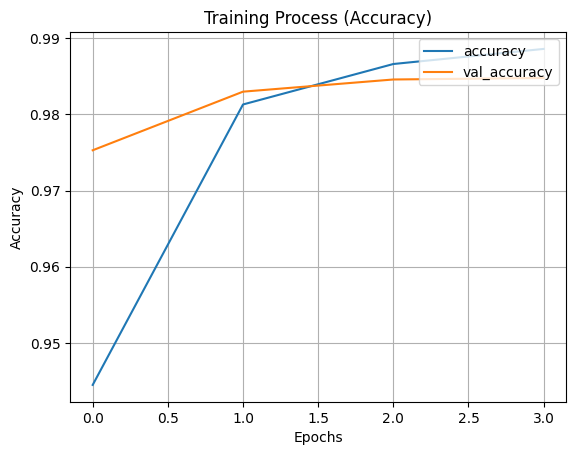

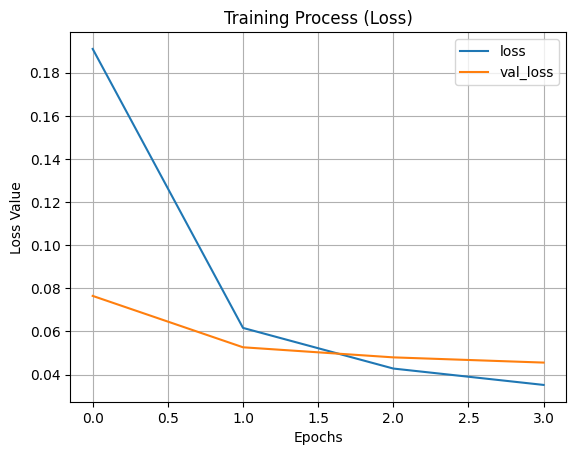

In [ ]:
# 繪製訓練過程中的準確度曲線
plt.title('Training Process (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.title('Training Process (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()